In [2]:
import astrocart as ac

# Pixel Regridding

In [10]:
temp = 'CloudO_FUGIN_13CO10.fits' #3D cube
reg = 'CloudO_8nu.fits'

regridded = ac.Pixel_Regrid(path_template=temp, path_toRegrid=reg, One_Dim3=True)
headert, datat = ac.Load_fits(temp)
headerr, datar = ac.Load_fits(reg)

print(f'template shape {datat[0].shape}\nto regrid shape {datar.shape}\nregridded shape {regridded.shape}')

template shape (28, 35)
to regrid shape (610, 683)
regridded shape (28, 35)


# Mappers

In [12]:
path1 = 'CloudO_FUGIN_13CO10.fits'
path2 = 'CloudO_IRAM_13CO21.fits'

pipe = ac.Mappers(path_trans1=path1, path_trans2=path2)

RMS1, RMS2 = pipe.run_RMS(10, 50) #between channels 10 and 50
print('done RMS')

tempMap_thin = pipe.Tex_thin(RMS1, RMS2)
print('done Tex')

ColDen_thin = pipe.Col_Den_thin(tempMap_thin) #this step should take a couple of minutes
print('done ColDen')

Tex2, Col2 = pipe.Dim2_Map(tempMap_thin, ColDen_thin)
print('done 2D Tex and 2D ColDen')

sig13CO = pipe.sigma_map(Col2, C18O=False) #ignore warning if any
print('done Mass Surface Density')

ksig_path = 'CloudO_HerschelSigma.fits'
CODep = pipe.CODep_Map(sig13CO, ksig_path)
print('done CO Depletion')

done RMS
done Tex
done ColDen
done 2D Tex and 2D ColDen
done Mass Surface Density
done CO Depletion


# Plotters

SpectralCube with shape=(307, 28, 35) and unit=K:
 n_x:     35  type_x: RA---SFL  unit_x: deg    range:   279.283069 deg:  279.360192 deg
 n_y:     28  type_y: DEC--SFL  unit_y: deg    range:    -7.214355 deg:   -7.153603 deg
 n_s:    307  type_s: VRAD      unit_s: km / s  range:      -48.975 km / s:     149.925 km / s


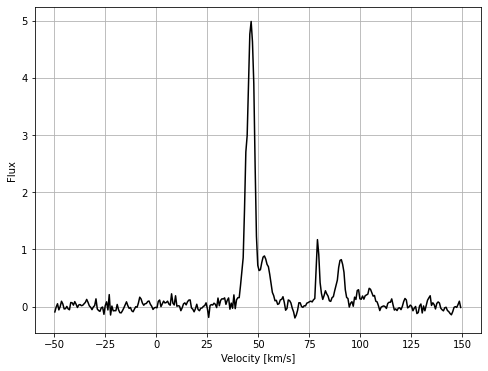

In [54]:
plots = ac.Plotter(path1)
fig, ax = plots.spectrum() #ignore warning

vmin 0.15
vmax 0.7


Text(0.5, 1.0, 'RMS Map')

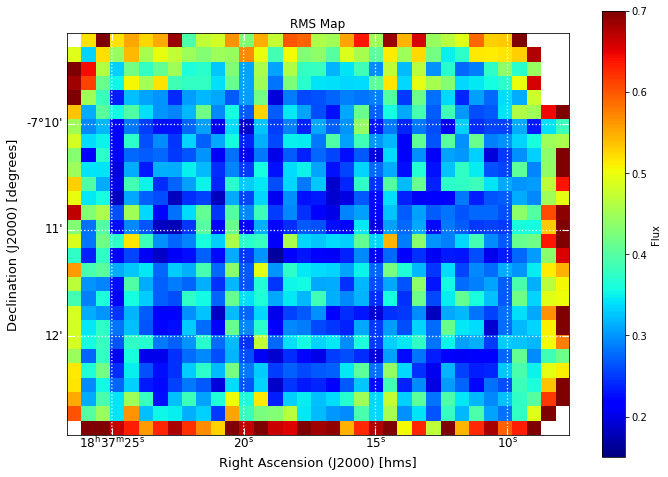

In [55]:
fig, ax = plots.map_plot(RMS2, vmin=0.15, vmax=0.7, location='right', fraction=0.04, clabel='Flux')
ax.set_title('RMS Map')

vmin 5
vmax 9


Text(0.5, 1.0, 'Optically Thin Excitation Temperature Map')

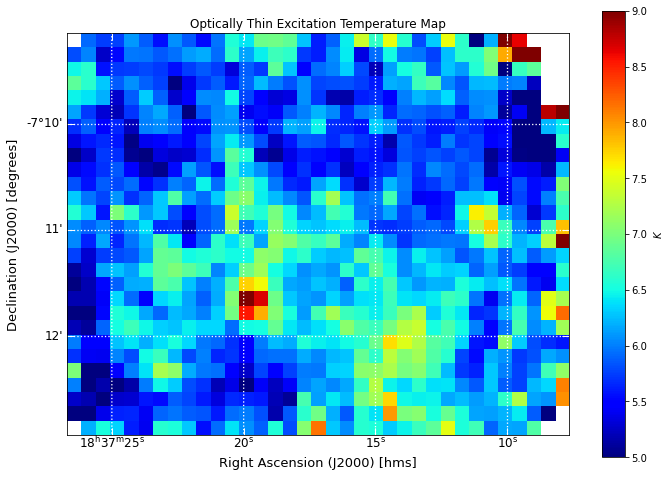

In [61]:
fig, ax = plots.map_plot(Tex2, vmin=5, vmax=9, location='right', fraction=0.04, clabel='$K$')
ax.set_title('Optically Thin Excitation Temperature Map')

vmin 2e+16
vmax 6e+16


Text(0.5, 1.0, 'Optically Thin Column Density Map')

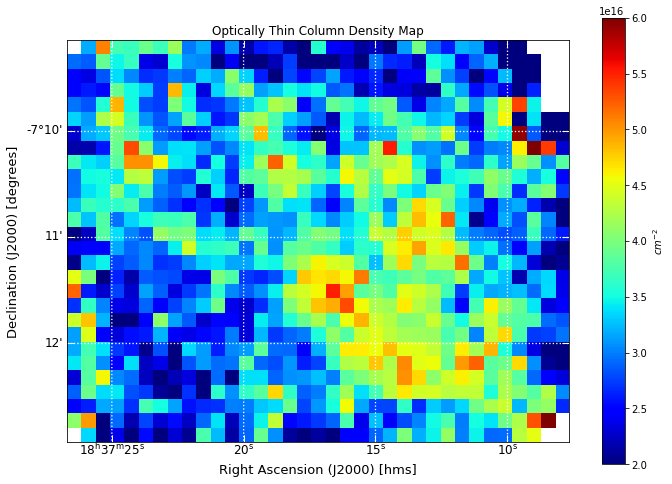

In [57]:
fig, ax = plots.map_plot(Col2, vmin=2e16, vmax=6e16, location='right', fraction=0.04, clabel='$cm^{-2}$')
ax.set_title('Optically Thin Column Density Map')

vmin 0.03
vmax 0.07


Text(0.5, 1.0, 'Optically Thin Column Density Map')

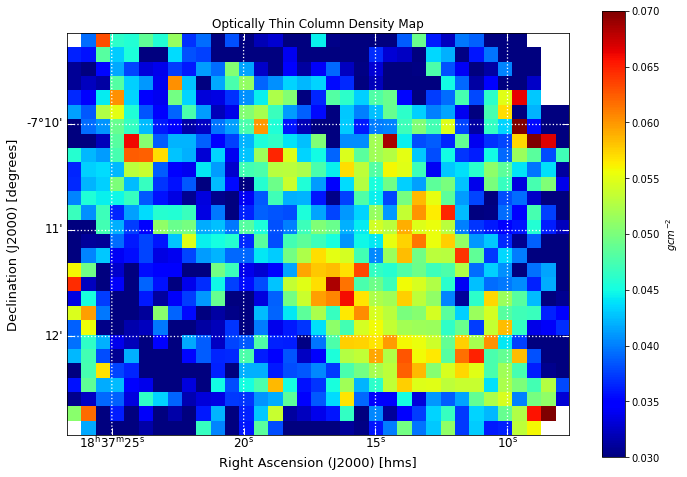

In [58]:
fig, ax = plots.map_plot(sig13CO, vmin=0.03, vmax=0.07, location='right', fraction=0.04, clabel='$gcm^{-2}$')
ax.set_title('Optically Thin Column Density Map')

vmin 1
vmax 10


Text(0.5, 1.0, 'CO Depletion')

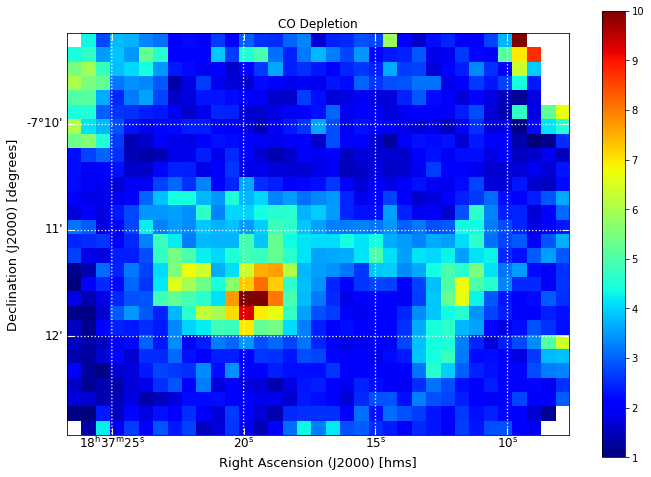

In [59]:
fig, ax = plots.map_plot(CODep, vmin=1, vmax=10, location='right', fraction=0.04)
ax.set_title('CO Depletion')

# Contour Overplots

vmin 1
vmax 10


(0.0, 27.0)

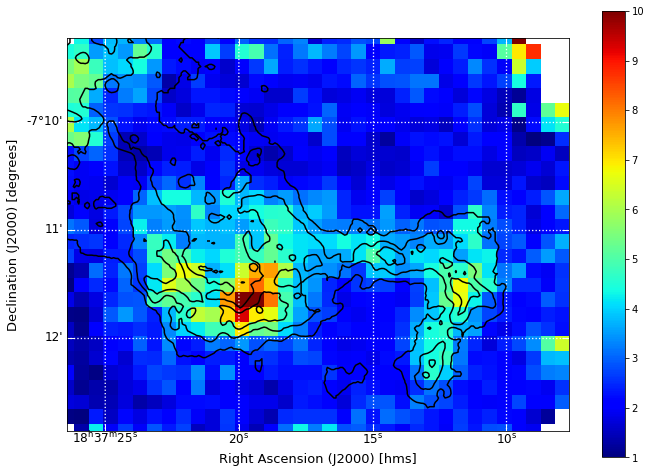

In [53]:
import numpy as np
cont = 'CloudO_8nu.fits'

levels = np.linspace(60, 120, 4)
fig, ax = plots.map_plot(CODep, contour_path=cont, cont_levels=levels, vmin=1, vmax=10, fraction=0.04, location='right')

ax.set_xlim(0, 34.5) #must add limits here because not using the regridded contour map
ax.set_ylim(0,27)